## 규제 (Regularization)

#### 1. 개념
- Regularization은 **OverFitting**을 방지하기 위해 사용됩니다.
- 모델의 파라미터 값에 패널티를 부여하여 모델이 과도하게 복잡해지지 않도록 적용.
- 일반적으로 손실 함수에 규제 항(term)을 추가하여 모델이 너무 많은 가중치를 가지는 것을 방지
- 규제의 주요 목적은 과대적합을 줄이고 모델의 일반화 성능을 향상시키는 것
- 선형 회귀 모델 -> 모델의 가중치 제한
- 다항 회귀 모델 -> 다항식의 차수 감소
- 
#### 2. 주의점
- 규제 강도가 너무 높으면 모델이 과소적합(underfitting)될 수 있습니다.
- 적절한 규제 강도를 찾기 위해 하이퍼파라미터 튜닝이 필요합니다.
- 잘못된 규제 적용은 모델 성능을 저하시킬 수 있습니다.

#### 3. 규제 방법

1) **L1 규제 (Lasso Regularization)**
$$L = \text{Loss} + \lambda \sum_{i} |w_i|$$
- L1 규제는 손실 함수에 가중치의 절대값 합계를 더합니다.
- 모델의 복잡도를 줄이기 위해 일부 회귀 계수를 0으로 만들어 불필요한 변수를 제거
- 덜 중요한 특징을 제거하려고 하기 때문에 Lasso 규제가 Ridge 규제에 비해 더 강하게 규제
---
2) **L2 규제 (Ridge Regularization)**
$$L = \text{Loss} + \lambda \sum_{i} w_i^2$$
- 모든 회귀 계수의 크기를 작게 만들어(0에 가깝게) 과대적합을 방지
---
3) **Elastic Net**
$$L = \text{Loss} + \lambda_1 \sum_{i} |w_i| + \lambda_2 \sum_{i} w_i^2$$
- L1 규제와 L2 규제를 혼합하여 사용하는 방법
- L1 규제의 변수 선택 효과와 L2 규제의 안정화 효과를 동시에 얻을 수 있다.
---
4) Early Stopping

<img src="https://velog.velcdn.com/images/newnew_daddy/post/8afb5153-8525-4890-8c7e-6e6f768973c2/image.png" width="50%">

- 모델이 과대적합되기 전에 학습을 중단. 
- 모델이 검증 데이터에서의 성능이 더 이상 향상되지 않을 때 학습을 중단하여 과대적합을 방지
- **검증 오차가 최솟값**에 도달하면 **훈련을 중단.**(오차의 상승이 확인되면 최솟값에 해당하는 파라미터를 복구)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [90]:
df = pd.read_csv('./dataset/regularization.csv')

df.head()

,X,Y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


In [48]:
X = df['X'].values
y = df['Y'].values

X.shape, y.shape

((30,), (30,))

In [49]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21,), (9,), (21,), (9,))

In [57]:
# Polynomial Features 변환
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.transform(X_test.reshape(-1, 1))

In [ ]:
# Linear Regression 모델 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 예측
X_poly = poly.transform(np.linspace(0, 1, 100).reshape(-1, 1))
y_pred_linear = model.predict(X_poly)

In [88]:
mse = mean_squared_error(y_test, model.predict(X_test_poly))

print("Regression Test MSE:", mse)
print("Regression Coefficients:", model.coef_)


Regression Test MSE: 0.032764882331397537
Regression Coefficients: [ 0.00000000e+00 -6.03575080e+01  1.61106342e+03 -1.80471000e+04
  1.08300012e+05 -3.84998175e+05  8.49485849e+05 -1.17632507e+06
  9.94990377e+05 -4.69889370e+05  9.49334839e+04]


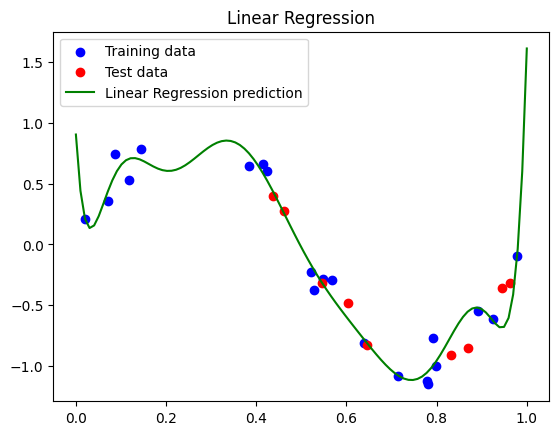

In [81]:
# 시각화

xx = np.linspace(0, 1, 100).reshape(-1, 1)

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(xx, y_pred_linear, color='green', label='Linear Regression prediction')
plt.title('Linear Regression')
plt.legend()
plt.show()

#### 1. Lasso Regression (L1 Regularization)

In [65]:
# Lasso Regression 모델 학습
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_poly, y_train)

Lasso(alpha=0.01, max_iter=10000)

In [ ]:
lasso.get_params()

In [70]:
# 예측
X_poly = poly.transform(xx)
y_pred_lasso = lasso.predict(X_poly)

In [89]:
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test_poly))

print("Lasso Regression Test MSE:", lasso_mse)
print("Lasso Regression Coefficients:", lasso.coef_)

Lasso Regression Test MSE: 0.04459731287679368
Lasso Regression Coefficients: [ 0.         -0.         -2.52485252 -0.         -0.          0.
  0.          0.          0.          0.          1.93532916]


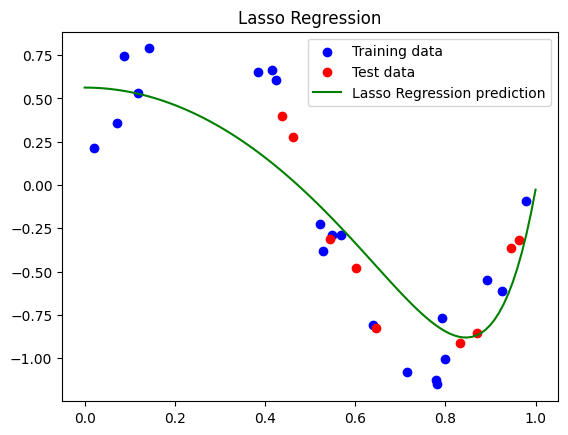

In [74]:
# 시각화
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(xx, y_pred_lasso, color='green', label='Lasso Regression prediction')
plt.title('Lasso Regression')
plt.legend()
plt.show()

#### 2. Ridge Regression (L2 Regularization)

In [75]:
from sklearn.linear_model import Ridge

In [76]:
# Ridge Regression 모델 학습
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

Ridge()

In [82]:
# 예측
X_poly = poly.transform(xx)
y_pred_ridge = ridge.predict(X_poly)

In [87]:
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test_poly))

print("Ridge Regression Test MSE:", ridge_mse)
print("Ridge Regression Coefficients:", ridge.coef_)

Ridge Regression Test MSE: 0.08604897966011843
Ridge Regression Coefficients: [ 0.         -0.69585409 -0.62850366 -0.41721892 -0.21483932 -0.05152844
  0.07230811  0.16333828  0.22889127  0.27521249  0.3071928 ]


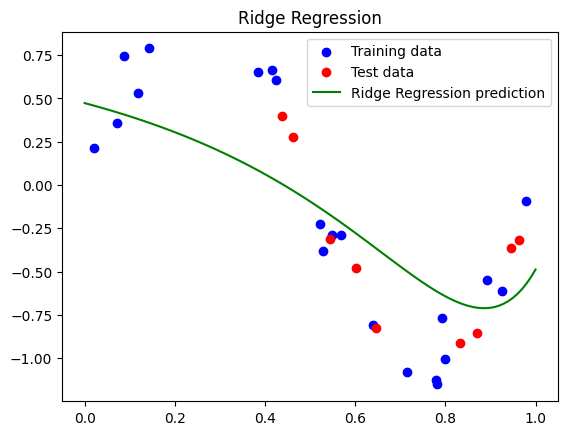

In [84]:
# 시각화

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(xx, y_pred_ridge, color='green', label='Ridge Regression prediction')
plt.title('Ridge Regression')
plt.legend()
plt.show()

#### 3. 규제 시각화 비교

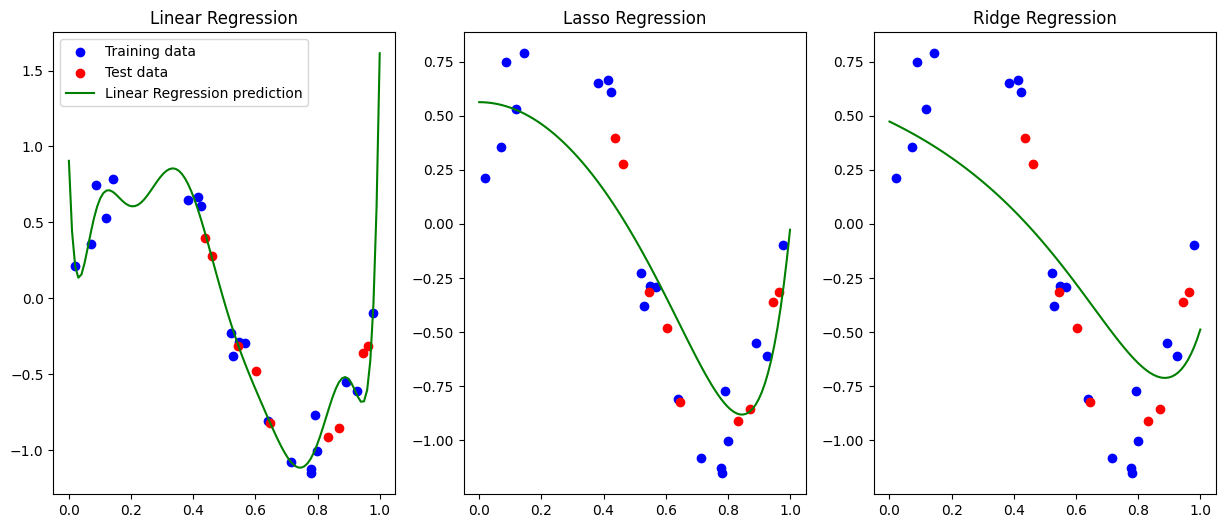

In [86]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(xx, y_pred_linear, color='green', label='Linear Regression prediction')
plt.title('Linear Regression')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(xx, y_pred_lasso, color='green')
plt.title('Lasso Regression')

plt.subplot(1,3,3)
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(xx, y_pred_ridge, color='green')
plt.title('Ridge Regression')
plt.show()